<h1><center>Libraries</center></h1>

Import the required libraries for the analysis.

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from dython.nominal import associations

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree

<h1><center>Data Preprocessing</center></h1>

Load the data.

In [2]:
df = pd.read_csv("rideshare_kaggle.csv")
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Drop the unnecessary columns.

In [3]:
df = df.drop(["id", "timestamp", "datetime", "timezone"],axis=1)

Let's check for any null values in our data. We can observe that only the `price` column contains a small number of null values. To address this, we can fill those null values with the mean of the `price` column.

In [4]:
null = df.isnull().sum().sort_values(ascending=False)

pd.DataFrame(
    data={"null_value": null.values, "null_percentage": null.values / len(df) * 100},
    index=null.index
)

,null_value,null_percentage
price,55095,7.949402
hour,0,0.000000
sunriseTime,0,0.000000
apparentTemperatureHighTime,0,0.000000
apparentTemperatureLow,0,0.000000
apparentTemperatureLowTime,0,0.000000
icon,0,0.000000
dewPoint,0,0.000000
pressure,0,0.000000
windBearing,0,0.000000


In [5]:
df["price"] = df["price"].fillna(df["price"].mean())

Sometimes not all features have a meaningful or strong relationship with the target variable. One way to check this is by using correlation. However, calculating the correlation can be tricky when dealing with a mix of numerical and categorical features. Fortunately, there is a Python library called `Dython` that can handle this for us.

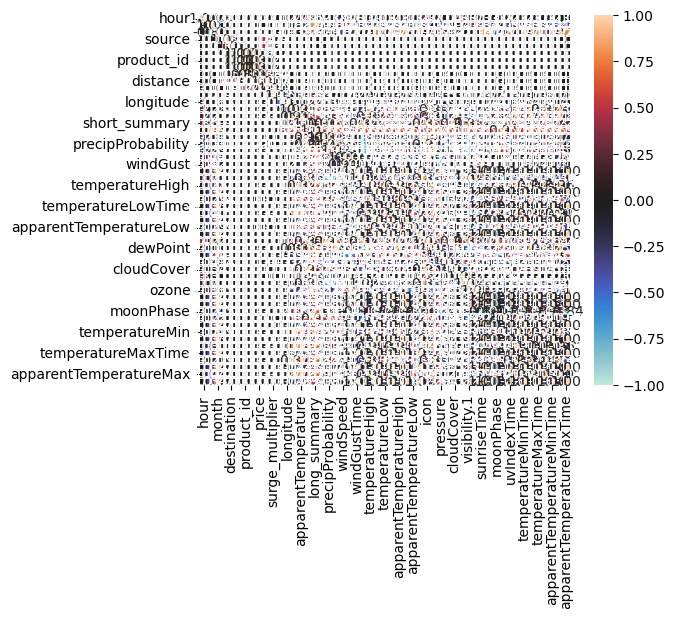

In [6]:
corr = associations(df)

To provide more clarity, let's focus on the correlation between each feature and the target variable, which in this case is price. It can be observed that there are numerous features with very low correlation to the price.

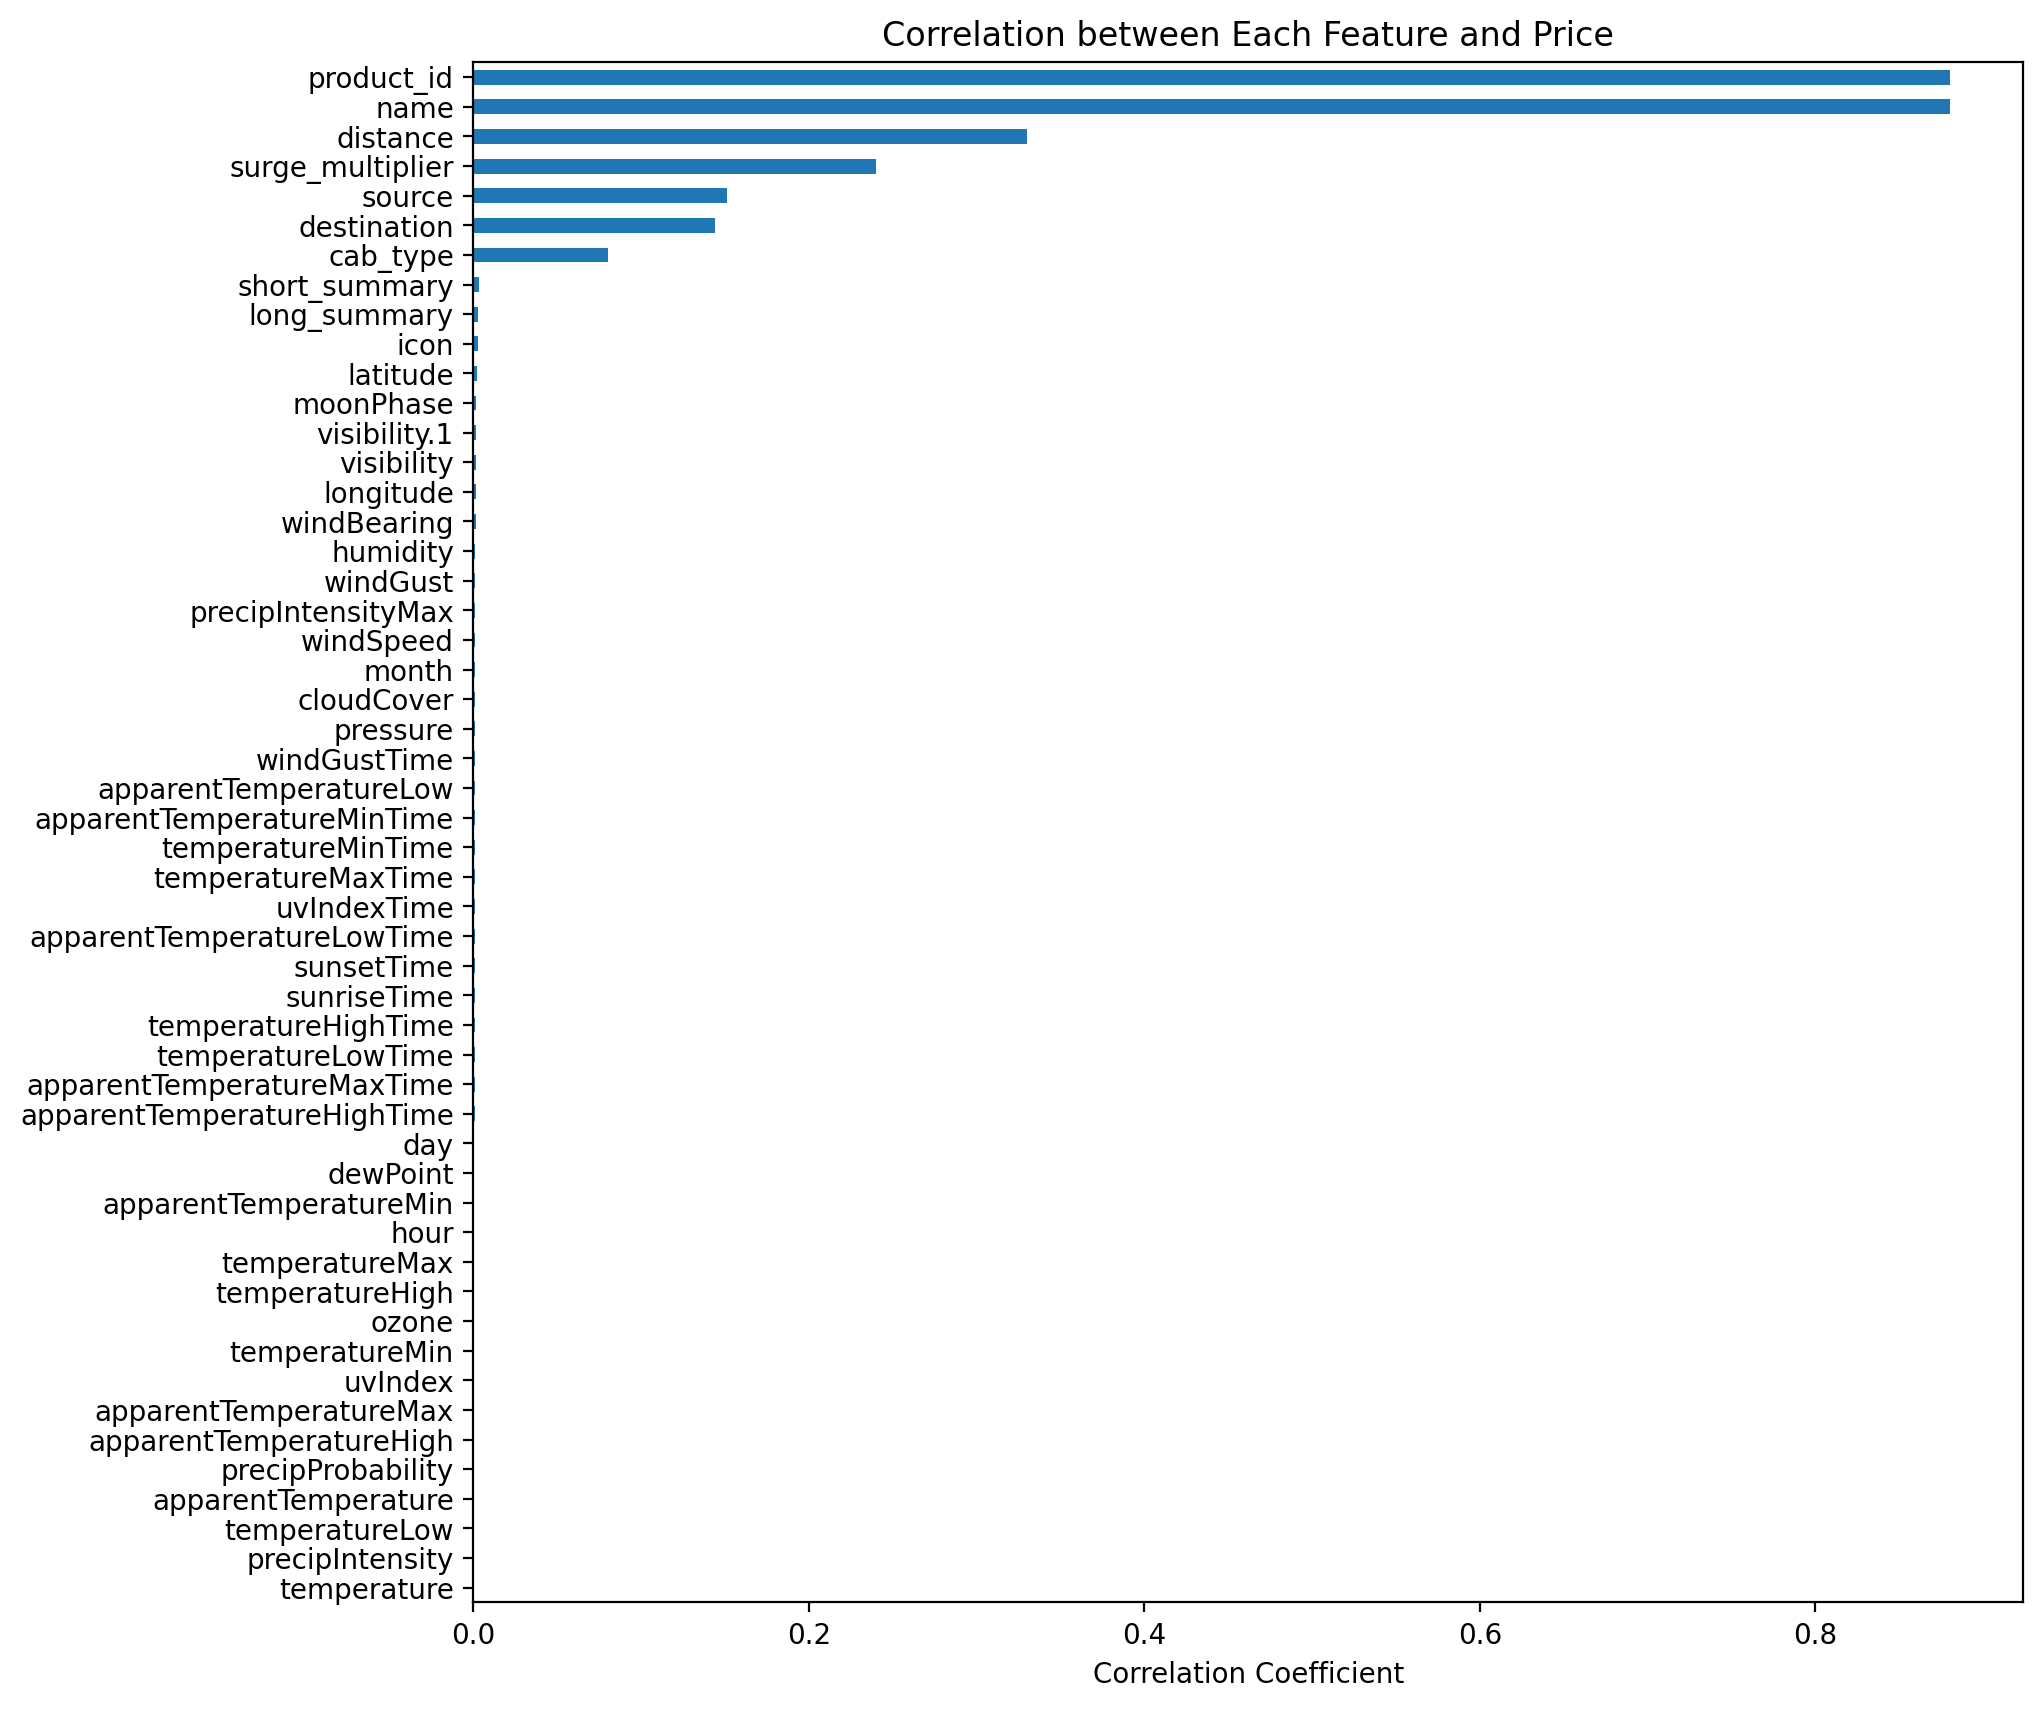

In [7]:
corr_price = abs(corr["corr"][["price"]].drop("price")).sort_values("price", ascending=False)

fig = plt.figure(figsize=(10, 10), dpi=200)
corr_price.sort_values("price").plot(
    kind="barh", 
    legend=None, 
    ax=plt.gca()
)

plt.title("Correlation between Each Feature and Price")
plt.xlabel("Correlation Coefficient")
plt.show()

To reduce the computational load, let's select the top 10 features with the highest correlation.

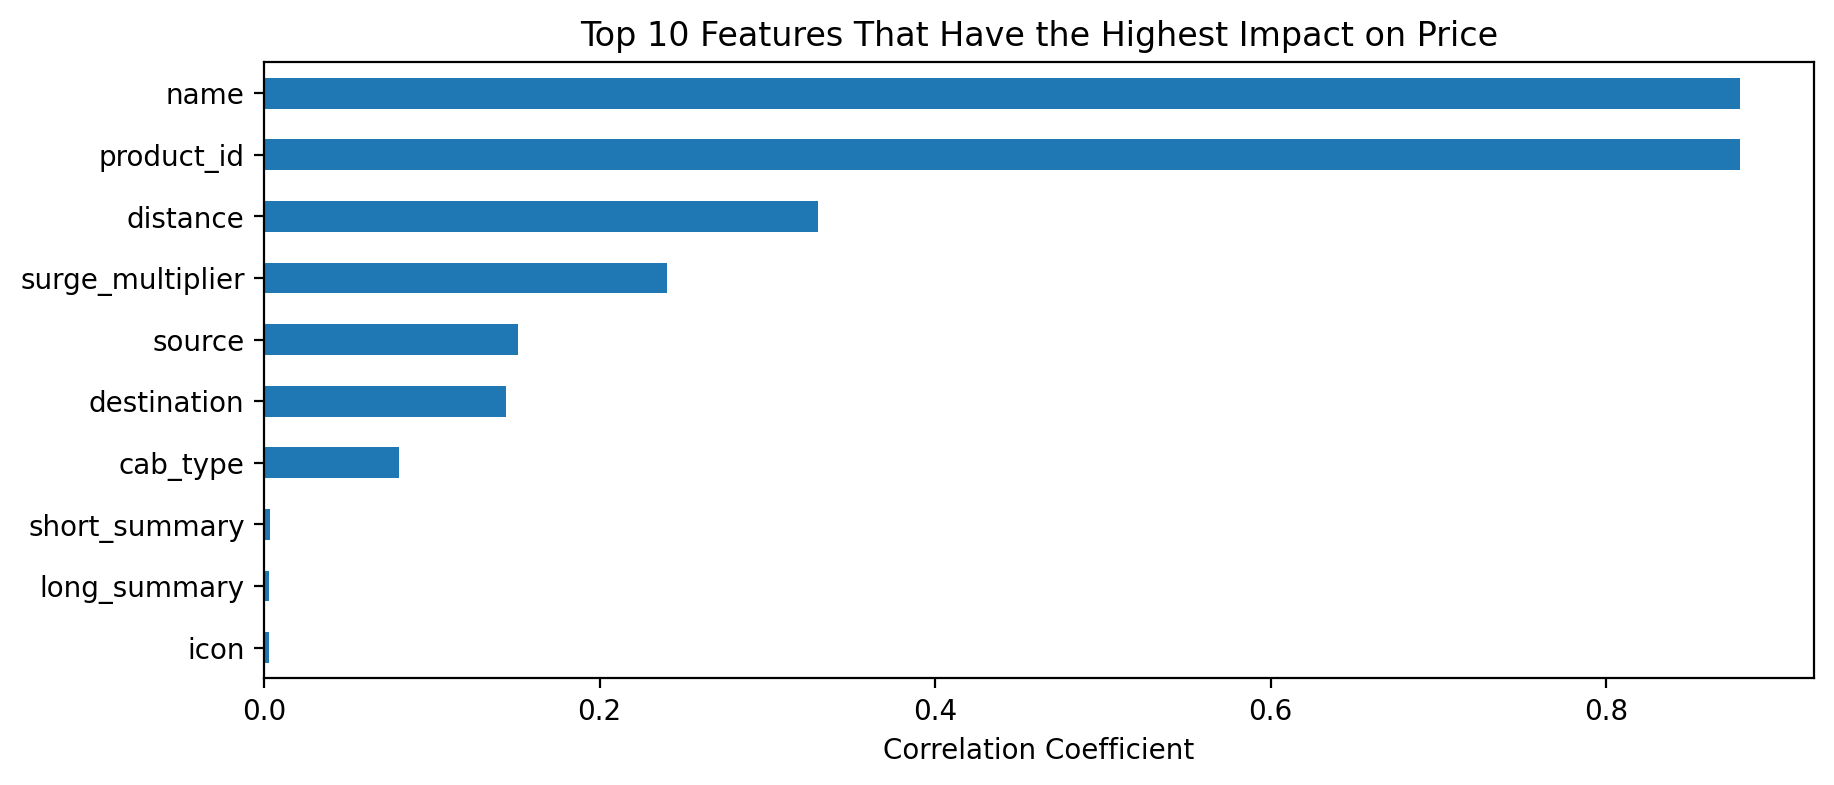

In [8]:
top_10_corr_price = abs(corr["corr"][["price"]].drop("price")).sort_values("price", ascending=False).head(10)

fig = plt.figure(figsize=(10, 4), dpi=200)
top_10_corr_price.sort_values("price").plot(
    kind="barh", 
    legend=None, 
    ax=plt.gca()
)

plt.title("Top 10 Features That Have the Highest Impact on Price")
plt.xlabel("Correlation Coefficient")
plt.show()

In [9]:
df = df[list(top_10_corr_price.index) + ["price"]]
df.head()

,product_id,name,distance,surge_multiplier,source,destination,cab_type,short_summary,long_summary,icon,price
0,lyft_line,Shared,0.44,1.0,Haymarket Square,North Station,Lyft,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night,5.0
1,lyft_premier,Lux,0.44,1.0,Haymarket Square,North Station,Lyft,Rain,"Rain until morning, starting again in the eve...",rain,11.0
2,lyft,Lyft,0.44,1.0,Haymarket Square,North Station,Lyft,Clear,Light rain in the morning.,clear-night,7.0
3,lyft_luxsuv,Lux Black XL,0.44,1.0,Haymarket Square,North Station,Lyft,Clear,Partly cloudy throughout the day.,clear-night,26.0
4,lyft_plus,Lyft XL,0.44,1.0,Haymarket Square,North Station,Lyft,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night,9.0


We can plot the average Lyft and Uber prices for each distance to obtain a better understanding of the comparison between the two.

Note: UberX is the standard Uber service, offering rides for up to 4 passengers.

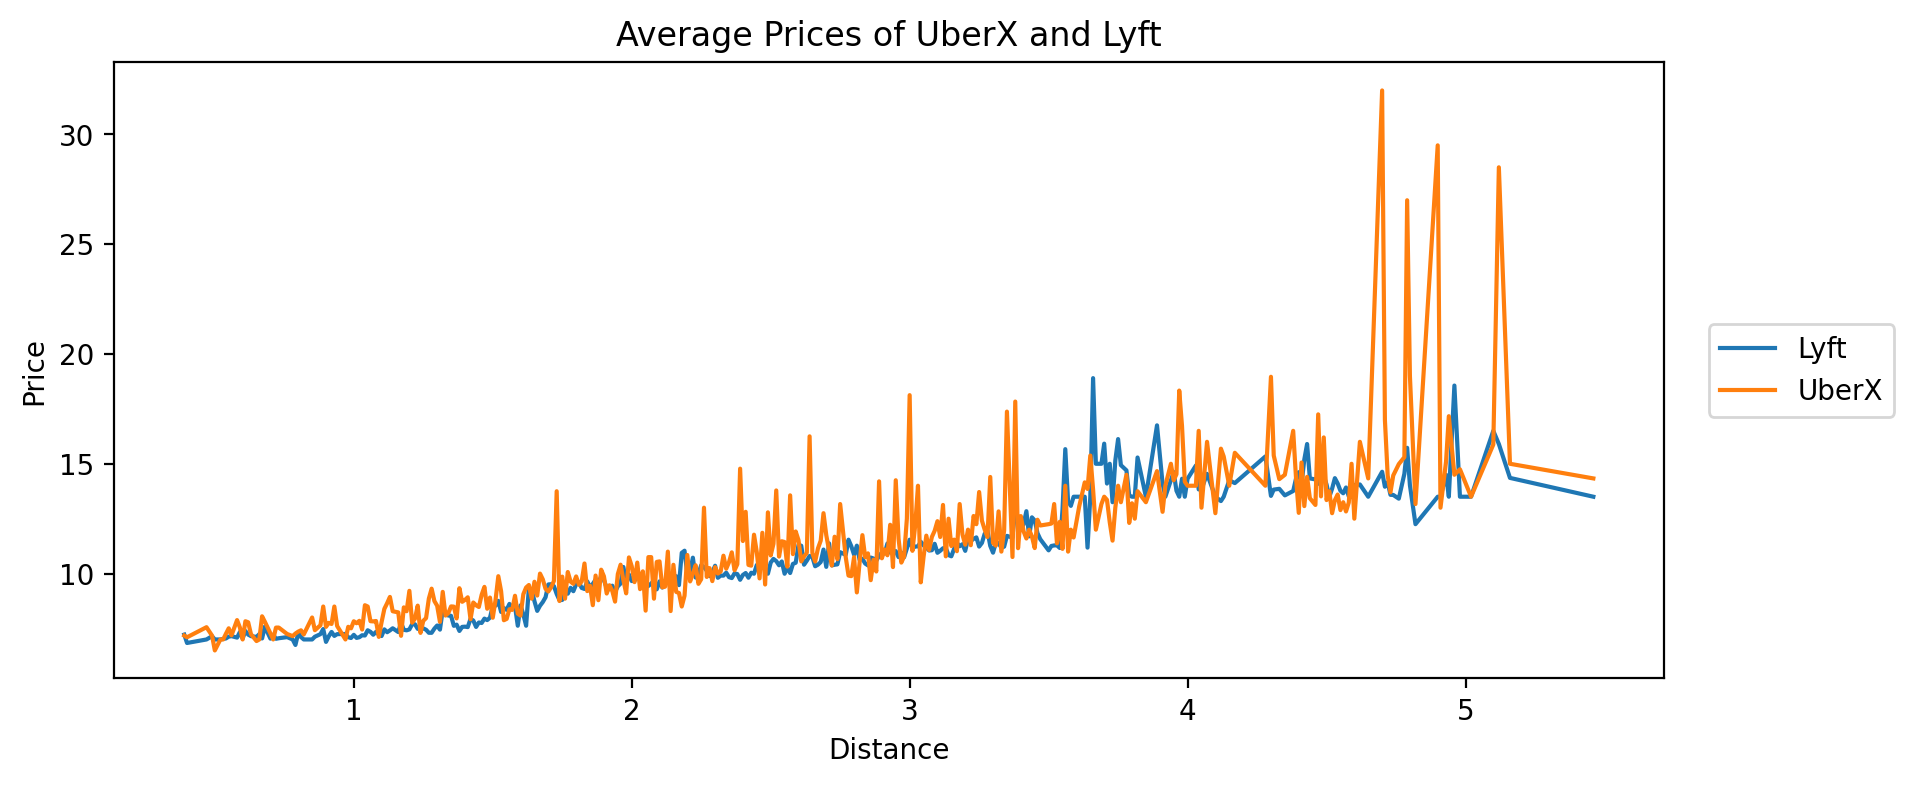

In [10]:
uberx_lyft_price_mean = df[
    (df["name"].isin(["UberX","Lyft"]))].groupby(["name","distance"]).mean()[["price"]
].reset_index()
uberx_lyft_price_mean = uberx_lyft_price_mean[
    uberx_lyft_price_mean["distance"].isin(
        set(
            list(uberx_lyft_price_mean[uberx_lyft_price_mean["name"] == "Lyft"]["distance"].unique())
        ).intersection(
            list(uberx_lyft_price_mean[uberx_lyft_price_mean["name"] == "UberX"]["distance"].unique())
        )
    )
]

plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=uberx_lyft_price_mean,x="distance",y="price",hue="name")
plt.title("Average Prices of UberX and Lyft")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left")
plt.show()

We can also plot the contribution of each service from Uber and Lyft to the overall sales. It is evident that Uber's Black SUV and Lyft's Lux Black XL are the major contributors to the total sales.

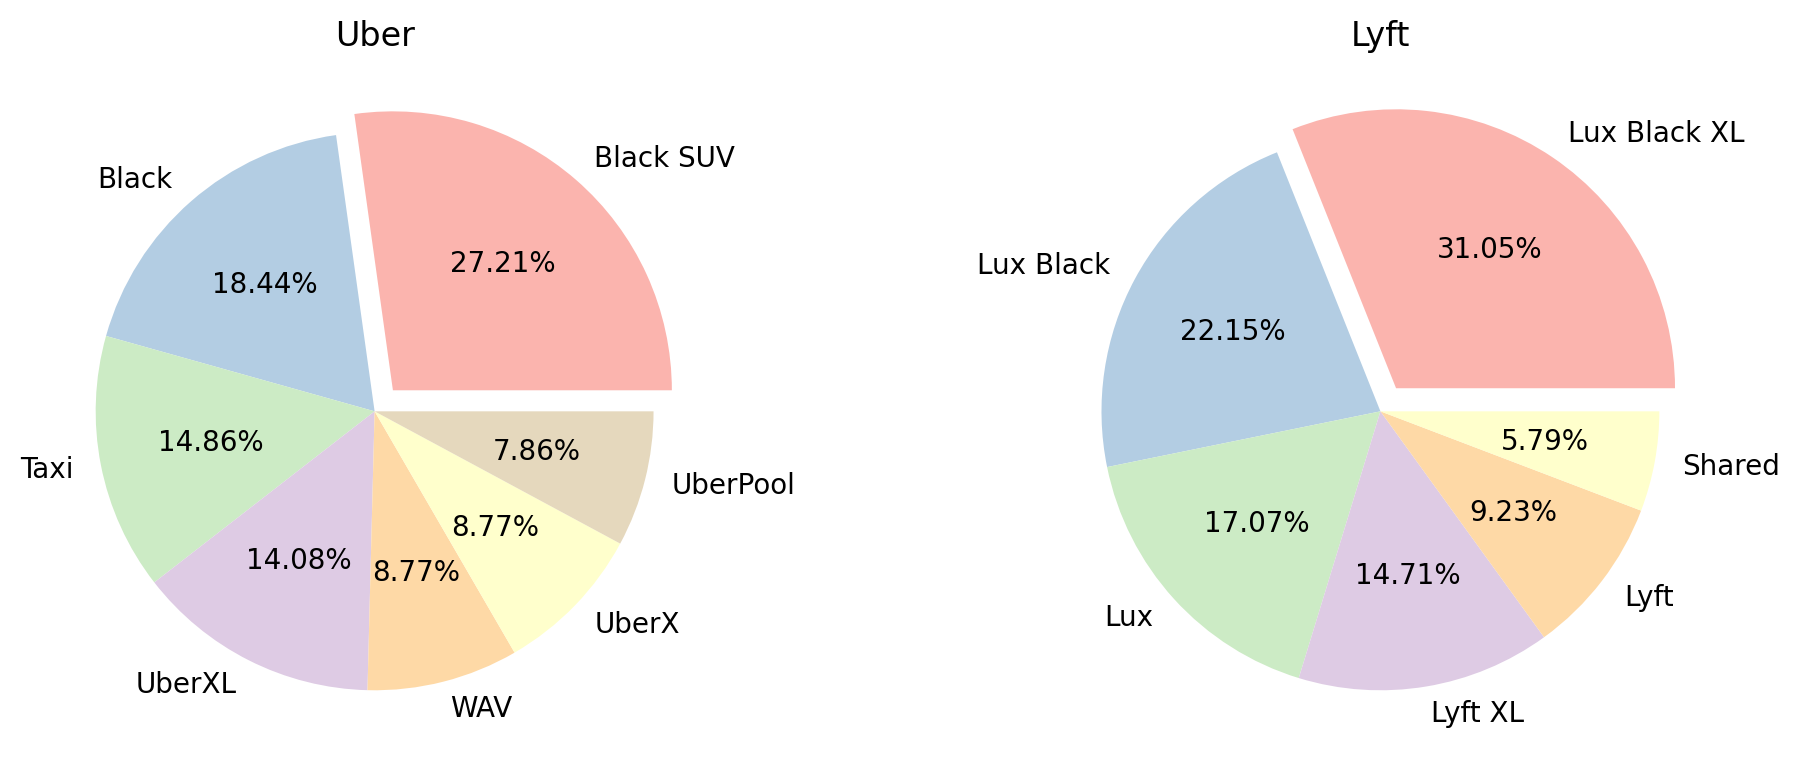

In [11]:
uber_name = df[df["cab_type"] == "Uber"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)
lyft_name = df[df["cab_type"] == "Lyft"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)

fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=1,ncols=2)

ax[0].pie(uber_name["price"],labels=uber_name.index,autopct="%.2f%%",explode=[0.1,0,0,0,0,0,0],colors=sns.color_palette("Pastel1"))
ax[0].set_title("Uber")

ax[1].pie(lyft_name["price"],labels=lyft_name.index,autopct="%.2f%%",explode=[0.1,0,0,0,0,0],colors=sns.color_palette("Pastel1"))
ax[1].set_title("Lyft")

plt.tight_layout()
plt.show()

<h1><center>Modeling</center></h1>

Let's define the X and y variables, where X represents the features and y represents the target variable. However, please note that since our features consist of categorical data, we need to convert them into numeric format. As these categorical variables are nominal and not ordinal, we can use the `pd.get_dummies()` function to convert them into dummy variables. It's important to be aware that converting to dummy variables may result in additional columns and can increase the computational load.

In [12]:
X = pd.get_dummies(df.drop("price", axis=1), drop_first=True)
y = df["price"]

Split the data into training and testing sets with a ratio of 70:30, using a random state to ensure consistency in the split.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 485149
Testing dataset		: 207922


Since our features are on different scales, we can standardize them using `StandardScaler()`, which applies the z-score transformation. The z-score measures how many standard deviations a data point is away from the mean. It is calculated by subtracting the mean of the feature from each data point and then dividing it by the standard deviation of the feature.

In [14]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In this analysis, let's utilize two algorithms: linear regression and random forest. By comparing the performance of these two algorithms, we can determine which one is more effective for our task.

Let's train our linear regression and random forest models on the scaled training data and evaluate their performance by making predictions on the scaled testing data. For the random forest model, we will use 10 trees, which should be sufficient for this data and help prevent overfitting.

- **Linear Regression**

In [15]:
lin_model = LinearRegression()
lin_model.fit(scaled_X_train, y_train)

LinearRegression()

In [16]:
lin_pred = lin_model.predict(scaled_X_test)

- **Random Forest**

In [17]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(scaled_X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [18]:
rf_pred = rf_model.predict(scaled_X_test)

After building our models, it is important to evaluate their performance. We will use three metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score. It is evident that the random forest model outperforms linear regression in all three metrics.

- **Mean Absolute Error (MAE)**
    - MAE represents the average absolute difference between the predicted values and the actual values.
    - For the random forest model with an MAE of 1.031021, it means that, on average, the predicted prices deviate by approximately USD 1.03 from the actual prices.
    - The lower the MAE, the better the model's performance in terms of accuracy and precision.
- **Root Mean Squared Error (RMSE)**
    - RMSE is the square root of the average squared difference between the predicted values and the actual values. 
    - For the random forest model with an RMSE of 1.732014, it means that, on average, the predicted prices deviate by approximately USD 1.73 from the actual prices.
    - Like MAE, a lower RMSE indicates better performance, as it measures the average magnitude of the prediction errors. RMSE is particularly useful for penalizing larger errors more heavily than smaller errors due to the squaring operation.    
- **R² Score (Coefficient of Determination)**
    - R² score measures the proportion of the variance in the target variable that can be explained by the predictors.
    - An R² score of 0 indicates that the model does not explain any of the variability in the target variable, while an R² score of 1 indicates a perfect fit.
    - For the random forest model with an R² score of 0.962449, it means that approximately 96.24% of the variance in the price can be explained by the features used in the model.
    - A higher R² score indicates that the model provides a better fit to the data, capturing more of the underlying relationships between the features and the target variable.

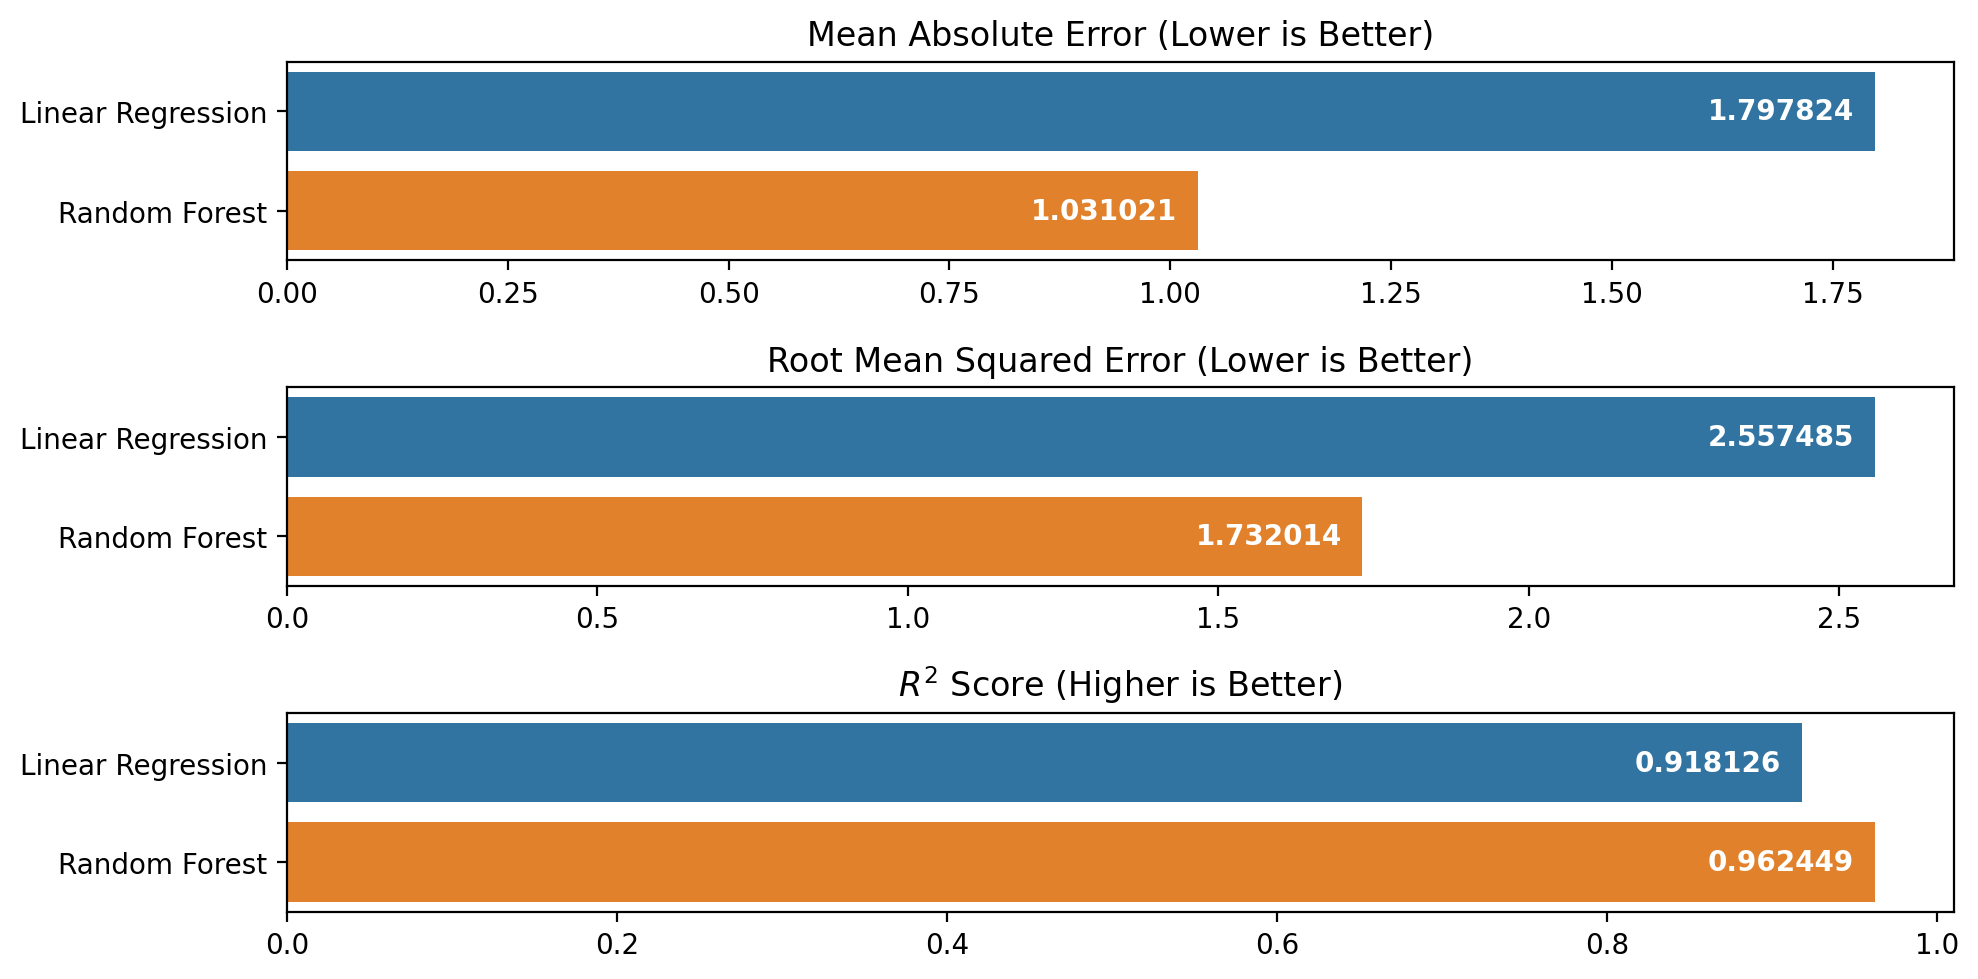

In [19]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=200, nrows=3, ncols=1)

barplot = sns.barplot(
    x=[mean_absolute_error(y_test, lin_pred), mean_absolute_error(y_test, rf_pred)], 
    y=["Linear Regression", "Random Forest"], 
    ax=ax[0]
)

for i in barplot.containers:
    barplot.bar_label(i, fmt="%.6f", padding=-60, color="white", fontweight="bold")
ax[0].set_title("Mean Absolute Error (Lower is Better)")

barplot = sns.barplot(
    x=[np.sqrt(mean_squared_error(y_test, lin_pred)), np.sqrt(mean_squared_error(y_test, rf_pred))], 
    y=["Linear Regression", "Random Forest"], 
    ax=ax[1]
)

for i in barplot.containers:
    barplot.bar_label(i, fmt="%.6f", padding=-60, color="white", fontweight="bold")
ax[1].set_title("Root Mean Squared Error (Lower is Better)")

barplot = sns.barplot(
    x=[r2_score(y_test, lin_pred), r2_score(y_test, rf_pred)], 
    y=["Linear Regression", "Random Forest"], 
    ax=ax[2]
)

for i in barplot.containers:
    barplot.bar_label(i, fmt="%.6f", padding=-60, color="white", fontweight="bold")
ax[2].set_title("$ R^{2} $ Score (Higher is Better)")

plt.tight_layout()
plt.show()

In [20]:
predictions = pd.DataFrame({
    "actual_price": np.array(y_test),
    "linear_regression_prediction": lin_pred,
    "random_forest_prediction": rf_pred
})
predictions.head(20)

,actual_price,linear_regression_prediction,random_forest_prediction
0,8.000000,8.838755,9.016950
1,13.500000,13.855357,16.200000
2,16.545125,13.942484,16.545125
3,16.545125,13.030161,16.545125
4,13.500000,14.919810,13.500000
5,27.500000,22.626841,26.600000
6,31.500000,31.077036,33.125000
7,26.000000,22.873911,26.112500
8,9.500000,6.688364,8.940000
9,16.500000,29.485239,17.400000


Since the random forest model outperforms the linear regression model, we will proceed with the random forest. Finally, we will create the final random forest model by fitting it to the entire data, rather than just the training data. This model is now ready to be deployed and used for making predictions on new, unseen data.

In [21]:
final_rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
final_rf_model.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=42)